## DDA3020 Autumn 2023 Homework 3 

### Programming Part 2：Neural Networks with PyTorch

--------------------------------------------------------------------------------------------------------------------------
In this notebook, we will build a fully-connected Neural Network and a Convolutional Neural Network with PyTorch, then apply on the MNIST data-set.

--------------------------------------------------------------------------------------------------------------------------


In [1]:
import numpy as np
import torch
import torch.nn as nn


### 1. Preparation: PyTorch basics and back-propagation (10 points)
PyTorch is one of the most popular frameworks for Deep Learning. To have a quick insight on how to use PyTorch, let's say that most of the functionalities of a numpy array are also maintained for torch tensors, except that the grammar might be slightly different. 

##### 1-1 (0.5 point) 

Set the random seed to 123. Create a random Tensor `a` of shape [3,20,20] with default normal distribution $\mathcal{N}(0,1)$. 

In [2]:
torch.manual_seed(123)
a = torch.randn(3,20,20)
print(a)

tensor([[[ 0.3374, -0.1778, -0.3035,  ..., -1.0205, -0.1690,  0.9178],
         [ 1.5810,  1.3010,  1.2753,  ..., -0.9343, -0.4991, -1.0867],
         [ 0.8805,  1.5542,  0.6266,  ..., -0.8036, -0.2808,  0.7697],
         ...,
         [ 0.9376, -0.9225,  0.7047,  ...,  1.7409,  0.2698,  0.9595],
         [-1.0253, -0.5505,  1.0264,  ..., -0.2866,  0.4343, -0.1340],
         [-2.1467, -1.7984, -0.6822,  ..., -1.4498,  1.5446,  1.0394]],

        [[ 2.1681,  0.4884,  0.3359,  ...,  1.3258,  0.2103,  1.7876],
         [-1.2128,  0.2045,  1.1051,  ...,  0.7392, -0.4931,  0.4073],
         [-1.0394, -0.3226,  0.7226,  ..., -0.3845,  0.6554, -0.1045],
         ...,
         [ 0.9202,  0.1743, -0.4796,  ...,  1.0720,  1.1054, -2.0586],
         [ 0.2878, -1.1389,  0.1729,  ..., -0.7809, -0.2270, -0.4358],
         [ 0.8209, -0.6353, -0.4386,  ..., -0.4097, -0.0627,  0.0175]],

        [[ 1.3715, -0.2226,  1.0566,  ..., -1.6292,  0.6107,  1.2718],
         [-0.9422, -0.2667, -0.3216,  ...,  0

##### 1-2 (0.5 point) 
1. Transfer `a` to a numpy array and print `a[0,0]`.
2. Transfer `a` back to torch tensor and print `a[0,0]`.

**Apart from this block, in this section, you shall not to use numpy**



In [3]:
a_np=a.numpy()
print(a_np[0,0])
a_ts=torch.from_numpy(a_np)
print(a_ts[0,0])

[ 0.3373702  -0.17777722 -0.3035276  -0.58801186  0.3486052   0.66034096
 -0.21963762 -0.37916982  0.76710707 -1.192502    0.6983519  -1.4097229
  0.17937961  1.895148    0.49544638  0.26919857 -0.07702024 -1.0204719
 -0.16895628  0.91776454]
tensor([ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196, -0.3792,
         0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,  0.2692,
        -0.0770, -1.0205, -0.1690,  0.9178])


##### 1-3 (1 point) 

Print for `a`: 
- its shape (size)
- its mean value over all entries
- its std over all entries
- its median value over all entries

In [4]:
print("Shape:",a.shape)

mean=torch.mean(a)
print("Mean:",mean.item())

std=torch.std(a)
print("Std:",std.item())

mid=torch.median(a)
print("Median:",mid.item())

Shape: torch.Size([3, 20, 20])
Mean: -0.002802974311634898
Std: 0.996509313583374
Median: -0.0016410714015364647


##### 1-4 (1 point)

Compute: 
- `b2` = the mean values of `a` along axis 2
- `b12`= the mean values of `a` along axis 1 and 2
- Print the shape of `b2` and `b12`

In [5]:
b2=torch.mean(a,dim=2)
print("Shape:",b2.shape)
b12=torch.mean(a,dim=(1,2))
print("Shape:",b12.shape)

Shape: torch.Size([3, 20])
Shape: torch.Size([3])


##### 1-5 (3 point) 

Set the random seed to 123. Create a neural network `model_tmp` of 3 layers:

- layer 1 ---------- : receives input of length 400, has 128 neurons with bias

- activation 1 ----- : relu

- layer 2 ---------- : receives input of length 128, has 64 neurons with bias

- activation 2 ----- : relu

- layer 3 ---------- : receives input of length 64, has 4 neurons without bias

- activation 3 ----- : softmax over axis -1

[Hint]: you will mainly use modules from torch.nn



In [6]:
import torch.nn as nn
torch.manual_seed(123)

class modeltemp(nn.Module):
    def __init__(self):
        super(modeltemp,self).__init__()

        self.fc1=nn.Linear(400,128,bias=True)
        self.act1=nn.ReLU()
        self.fc2=nn.Linear(128,64,bias=True)
        self.act2=nn.ReLU()
        self.fc3=nn.Linear(64,4,bias=False)
        self.act3=nn.Softmax(dim=-1)

    def forward(self,x):
        x=self.fc1(x)
        x=self.act1(x)
        x=self.fc2(x)
        x=self.act2(x)
        x=self.fc3(x)
        x=self.act3(x)
        return x

model_tmp=modeltemp()

##### 1-6 (1 point) 

Flatten the two last axis of `a` and apply `model_tmp` on `a`. Print your output.

`[Verify]`: Your output should be $$[[0.2528, 0.2571, 0.2370, 0.2530],\\
        [0.2508, 0.2230, 0.2388, 0.2874],\\
        [0.2643, 0.2372, 0.2225, 0.2761]]$$

In [7]:
a_flat=a.view(a.size(0),-1)
#print(a)
output=model_tmp(a_flat)
print(output.data)

tensor([[0.2528, 0.2571, 0.2370, 0.2530],
        [0.2508, 0.2230, 0.2388, 0.2874],
        [0.2643, 0.2372, 0.2225, 0.2761]])


##### 1-7 (1 point) 
Calculate the MSE loss between `this output` and an `all-1 tensor`. Print your result.

`[Verify]`: Your output should be 0.5629

[Hint]: You can use either **torch.nn.functional** or **torch.nn** or **torch**


In [8]:
import torch.nn.functional as F

temp=torch.ones_like(output)
mse=F.mse_loss(output,temp)
print(mse.item())

0.5628582239151001


##### 1-8 (1 point) 
Excecute `back-propagation` on this loss and extract the gradient of the `final layer` of model_tmp as `grd`. Print `grd[:,5]`

`[Verify]`: You should see $$[ 7.4889 e^{-5}, -2.6256e^{-5}, -3.4365e^{-4},  2.9502 e^{-4}]$$

[Hint]: To extract the weights, you can use w_last_layer = list(model.parameters())[-1] or any other more elegant phrase.

In [9]:
mse.backward()
w_last_layer=list(model_tmp.parameters())[-1]
grd=w_last_layer.grad
print(grd[:,5])

tensor([ 7.4887e-05, -2.6258e-05, -3.4365e-04,  2.9502e-04])


##### 1-9 (1 point) 
1. Create a `SGD optimizer` with learning_rate = `1e-3` associated with the parameters of model_tmp. 
2. Step this optimizer. 
3. Verify that the `variation of the parameters` of the last layer equals `1e-3 * grd`, except that there might be some machine inaccuracies.

[Hint]: You can simple print something and we'll see that most of the entries are near 0 or that most of the entries are near 0.001

In [10]:
optimizer=torch.optim.SGD(model_tmp.parameters(),lr=1e-3)
optimizer.step()
w_last_layer_new=list(model_tmp.parameters())[-1]
print(w_last_layer_new-w_last_layer)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.

### 2. Simple fully-connected NN (MLP) (12 points)

**`Procedure`**: (1+1+1+1 = 4 points)
1. Create a fully-connected neural network, which will be a MLP. This NN will take the fattened images ([28,28] -> [28*28]) as input.  
2. Choose your optimizer and criterion (loss function).
3. Train some epoches (you can start with 10) on the MNIST data-set.
4. Keep your best model according to validation loss.
5. `Save your best model and attach it in your submitted zip`.

**`Required outputs`**: (1+1+2 = 4 points)
1. Print averaged train loss and validation loss at the end of each epoch.
2. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
3. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 


4 points are given according to your test performance. `4 is given if you have correct test prediction rate > 90.00%`



In [11]:
#### prepare data-set
#### you re expected to have either pickle or torchvision in your environment

import torch
from torch.utils.data import DataLoader, Dataset, Subset
import importlib

# python > 3.4
if importlib.util.find_spec('torchvision') is None: # if you do not have torchvision, use TA's downloaded data
    import pickle as pkl

    with open('./MNIST_dataset_local','rb') as read_file:
        data = pkl.load(read_file)
        read_file.close()

    train_images, train_labels = data['train']
    test_images, test_labels = data['test']

    val_images, val_labels = train_images[5500:], train_labels[5500:]
    train_images, train_labels = train_images[:5500], train_labels[:5500]

    class myMnistDataSet(Dataset):

        def __init__(self,images,labels):
            self.X = images[:,None,...]
            self.y = labels

        def __len__(self):
            return len(self.X)

        def __getitem__(self, index):
            image = self.X[index]
            label = self.y[index]
            return torch.Tensor(image), torch.tensor(label)[0]
        
    mnist_train = myMnistDataSet(train_images, train_labels.astype('int64'))
    mnist_test = myMnistDataSet(test_images, test_labels.astype('int64'))
    mnist_val = myMnistDataSet(val_images, val_labels.astype('int64'))

else: # use torchvision
    from torchvision import transforms, datasets

    mnist_download_path = './MNIST_dataset'
    datasets.MNIST(root=mnist_download_path, download=True)

    mnist_train = datasets.MNIST(root = mnist_download_path, train = True, transform=transforms.ToTensor())
    mnist_val   = Subset(mnist_train, list(range(5500,6000)))
    mnist_train = Subset(mnist_train, list(range(5500)))

    mnist_test  = datasets.MNIST(root = mnist_download_path, train = False, transform=transforms.ToTensor())


def get_loaders(batch_size):
    train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True)
    val_loader   = DataLoader(mnist_val, batch_size = batch_size, shuffle=False)
    test_loader  = DataLoader(mnist_test, batch_size = batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# get to know your loader
batch_size = 32
train_loader, val_loader, test_loader = get_loaders(batch_size)

for im, l in val_loader:
    break

print(im.shape, l.shape)
print(l)

torch.Size([32, 1, 28, 28]) torch.Size([32])
tensor([1, 9, 0, 9, 7, 0, 5, 1, 2, 2, 3, 3, 0, 4, 0, 5, 1, 6, 9, 7, 1, 8, 9, 9,
        6, 0, 5, 1, 2, 2, 1, 3])


In [12]:
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.fc1=nn.Linear(28*28,256)
        self.relu1=nn.ReLU()
        self.fc2=nn.Linear(256,128)
        self.relu2=nn.ReLU()
        self.fc3=nn.Linear(128,10)
    
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.fc1(x)
        x=self.relu1(x)
        x=self.fc2(x)
        x=self.relu2(x)
        x=self.fc3(x)
        return x

model=MLP()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
criterion=nn.CrossEntropyLoss()

#train process
train_loss_list=[]
val_loss_list=[]
best_model=None
best_val_loss=float('inf')

for epoch in range(10):
    train_loss=0.0
    val_loss=0.0
    model.train()
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    
    model.eval()
    with torch.no_grad():
        for images,labels in val_loader:
            outputs=model(images)
            loss=criterion(outputs,labels)
            val_loss+=loss.item()
    
    train_loss/=len(train_loader)
    val_loss/=len(val_loader)

    if(val_loss<best_val_loss):
        best_val_loss=val_loss
        best_model=model.state_dict()

    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    print(f"Epoch {epoch+1}: Train loss={train_loss}, Val loss={val_loss}")

torch.save(best_model,'best_model_fc.pth')


Epoch 1: Train loss=1.2381311396873274, Val loss=0.5080029498785734
Epoch 2: Train loss=0.41994730400484664, Val loss=0.34726834017783403
Epoch 3: Train loss=0.30822151565794337, Val loss=0.29189522191882133
Epoch 4: Train loss=0.2483314948026524, Val loss=0.2907943492755294
Epoch 5: Train loss=0.20032757170888227, Val loss=0.26184060610830784
Epoch 6: Train loss=0.16403792721630875, Val loss=0.26246787048876286
Epoch 7: Train loss=0.12726762871322936, Val loss=0.2165979479905218
Epoch 8: Train loss=0.11062389168736719, Val loss=0.21312472131103277
Epoch 9: Train loss=0.0899541869185605, Val loss=0.2355050561018288
Epoch 10: Train loss=0.0690367492240702, Val loss=0.23374371917452663


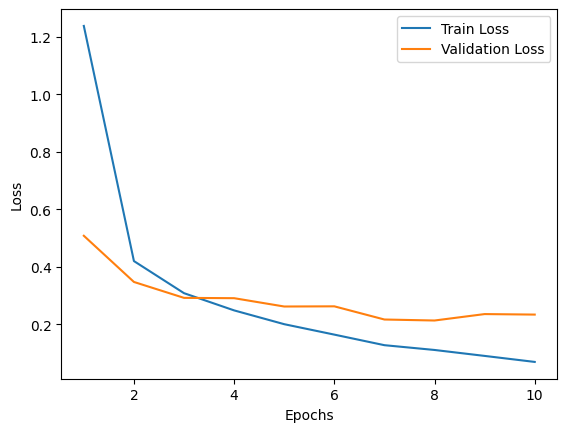

In [13]:
#plotting
epochs=range(1,11)
plt.plot(epochs,train_loss_list,label='Train Loss')
plt.plot(epochs,val_loss_list,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
#testing
test_loss=0.0
correct=0
test_sum=0

test_model=MLP()
test_model.load_state_dict(torch.load('best_model.pth'))
test_model.eval()
with torch.no_grad():
    for images,labels in test_loader:
        outputs=test_model(images)
        loss=criterion(outputs,labels)
        test_loss+=loss.item()
        _,pred=torch.max(outputs.data,1)
        test_sum+=labels.size(0)
        for i in range(len(pred)):
            if(pred[i]==labels[i]):
                correct+=1
    
    test_loss/=len(test_loader)
    acc=correct/test_sum*100
    print(f"Test Loss:{test_loss}")
    print(f"Accuracy:{acc}%")

Test Loss:0.2343387377549546
Accuracy:93.04%


### 3. Bonus - Weight game (Bonus 2+4+1 = 7 points. Bonus is for this exercise exclusively)

3-1. Display
- The average image of respectively label 1-10 over the validation set.

3-2. Build a 1-layer NN for this problem. Use `Binary Cross Entropy Loss` as validation criterion. Train some epoches until `validation loss < 0.1`. This 1-layer NN has no more than 2 parameters (w and b). Display w with respect to label 1-10, for:

 - Before training (randomly initialized weights). Print the validation loss at this moment.
 - After val loss < 0.1 

3-3. Use **`one word`** to marize the mecanism with which this NN works.

[Hint]: 
 - For display, please refer to solution_HW1_polynomial_regression for loop structure. This time you will use plt.imshow()  
 - The weight shape is [10,28*28]. Reshape to [10,28,28] then plot 10 times [28,28]

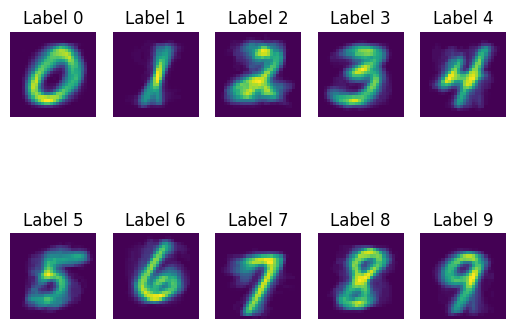

In [15]:
#3-1
test_model.eval()
image_sum=np.zeros((10,28,28))
image_cnt=np.zeros(10)

with torch.no_grad():
    for images,labels in val_loader:
        outputs=test_model(images)
        _,pred=torch.max(outputs.data,1)
        for i in range(len(labels)):
            label=labels[i].item()
            image=images[i].numpy().squeeze()
            image_sum[label]+=image
            image_cnt[label]+=1

avg=image_sum/image_cnt[:,np.newaxis,np.newaxis] #image_cnt should be in shape of(10,1,1)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(avg[i],)
    plt.title(f"Label {i}")
    plt.axis('off')
plt.show()

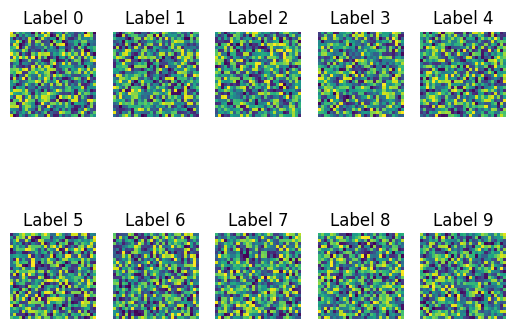

Validation loss before training is 0.66


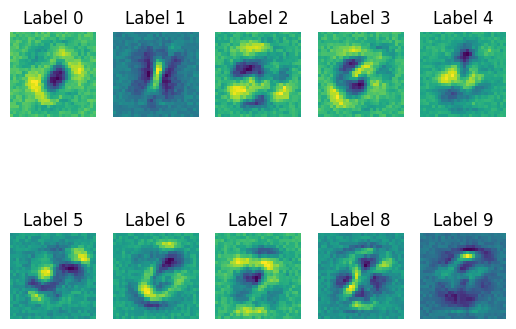

Validation loss after training is 0.10


In [16]:
#3-2
class ol_NN(nn.Module):
    def __init__(self):
        super(ol_NN,self).__init__()
        self.fc=nn.Linear(28*28,10)
    
    def forward(self,x):
        x=x.view(-1,28*28)
        x=torch.sigmoid(self.fc(x))
        return x

ol_model=ol_NN()
optimizer=torch.optim.SGD(ol_model.parameters(),lr=0.1)
criterion=nn.BCELoss()

before_weights=ol_model.fc.weight.data.view(-1,28,28).numpy()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(before_weights[i],)
    plt.title(f"Label {i}")
    plt.axis('off')
plt.show()

ol_model.eval()
before_loss=0.0
for images,labels in val_loader:
    outputs=ol_model(images)
    loss=criterion(outputs,torch.eye(10)[labels])
    before_loss+=loss.item()*images.size(0)
before_loss/=len(val_loader.dataset)
print(f"Validation loss before training is {before_loss:.2f}")

val_loss=0.1 #to start the while loop, any number>=0.1 is ok
#epoch=1
while(val_loss>=0.1):
    train_loss=0
    val_loss=0

    ol_model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs=ol_model(images)
        loss=criterion(outputs,torch.eye(10)[labels])
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    
    ol_model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            optimizer.zero_grad()
            outputs=ol_model(images)
            loss=criterion(outputs,torch.eye(10)[labels])
            val_loss+=loss.item()
    
    train_loss/=len(train_loader)
    val_loss/=len(val_loader)
    #print(f"Epoch {epoch}: Train Loss={train_loss}, Val Loss={val_loss}")
    #epoch+=1

after_weights=ol_model.fc.weight.data.view(-1,28,28).numpy()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(after_weights[i],)
    plt.title(f"Label {i}")
    plt.axis('off')
plt.show()

ol_model.eval()
print(f"Validation loss after training is {val_loss:.2f}")

**One word**: linear

### 4. CNN (13 points)

`Build your own CNN from scratch (3 points)` to solve this classification problem. Choose any optimizer and criterion that you want. Regulate your CNN structure and try to have as good result as possible.


**`Required outputs`**: (0.5+1+1+2+1 = 5.5 points)
1. Print the number of parameters of your cnn model.
2. Print averaged train loss and validation loss at the end of each epoch.
3. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
4. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 
5. Display the confusion matrix of your best model on the test set.
6. `Save your best model and attach it in your submitted zip`.


4.5 points are given according to your test performance. `4.5 is given if you have correct test prediction rate > 97.00%.`

[Hint]: 
1. If you use batch normalizations, be aware of what BatchNorm does while fed with data (you will need to add two lines of codes to manage your training and testing).
1. As for confusion matrix (multi-class classfication), consider a $10\times 10$ matrix where each row represents "gt is" and each column represents "is predicted as", then do a counting with all the test samples. You will obtain a gray-scale image (2D matrix).





------------------------------------------------------------------------------------------------------------------------------------------------
`Discussion for computational cost`: 

If you have NVIDIA card on your PC, you can use `cuda` to accelerate the calculation. However, theoretically, `2 layers of CNN are enough` to have at least 97% test accuracy for this exercise. 

If your PC has no worse than Intel Core i5-8250U Processor (as had the TA's PC in 2019) and your code is well done, the program shall be guaranteed to run fast.

Conventionally, `you are encouraged to construct not too complicated CNN` to save computational cost, since MNIST is a relatively simple problem. However, `as long as your code works out for you, no point will be removed if your CNN is huge`.

------------------------------------------------------------------------------------------------------------------------------------------------


Number of parameters in the CNN model is  206922
Epoch 1: Train loss=0.8540554692059062, Val loss=0.30391016509383917
Epoch 2: Train loss=0.24646951721677945, Val loss=0.21704296255484223
Epoch 3: Train loss=0.16198144246672475, Val loss=0.18335342733189464
Epoch 4: Train loss=0.1113830204988115, Val loss=0.1321632240433246
Epoch 5: Train loss=0.08632549822877356, Val loss=0.14082242280710489
Epoch 6: Train loss=0.06581780081614852, Val loss=0.11800501419929788
Epoch 7: Train loss=0.04949623773410527, Val loss=0.13162621739320457
Epoch 8: Train loss=0.0444358988288725, Val loss=0.12368686322588474
Epoch 9: Train loss=0.02824364229867527, Val loss=0.12975739961257204
Epoch 10: Train loss=0.029642752975463694, Val loss=0.12494198832428083


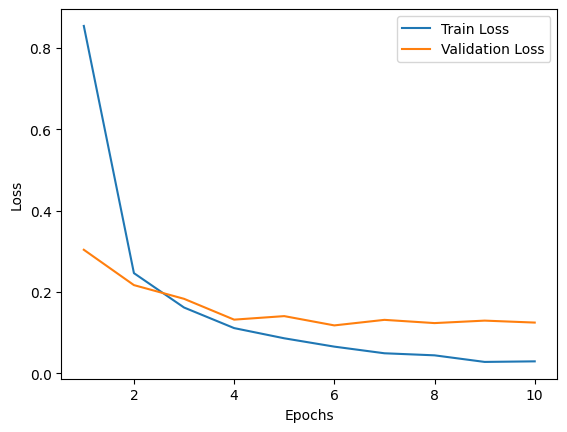

In [17]:
torch.manual_seed(123)

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,16,kernel_size=3,stride=1,padding=1)
        self.relu1=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=2,stride=2)

        self.conv2=nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2,stride=2)

        self.fc1=nn.Linear(32*7*7,128)
        self.relu3=nn.ReLU()
        self.fc2=nn.Linear(128,10)
    
    def forward(self,x):
        x=self.conv1(x)
        x=self.relu1(x)
        x=self.pool1(x)
        x=self.conv2(x)
        x=self.relu2(x)
        x=self.pool2(x)
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        x=self.relu3(x)
        x=self.fc2(x)

        return x

model=CNN()

def num_Param(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Number of parameters in the CNN model is ",num_Param(model))

optimizer=torch.optim.Adam(model.parameters(),lr=0.00058)
criterion=nn.CrossEntropyLoss()

#train process
train_loss_list=[]
val_loss_list=[]
best_model=None
best_val_loss=float('inf')

for epoch in range(10):
    train_loss=0.0
    val_loss=0.0
    model.train()
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    
    model.eval()
    with torch.no_grad():
        for images,labels in val_loader:
            outputs=model(images)
            loss=criterion(outputs,labels)
            val_loss+=loss.item()
    
    train_loss/=len(train_loader)
    val_loss/=len(val_loader)

    if(val_loss<best_val_loss):
        best_val_loss=val_loss
        best_model=model.state_dict()

    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    print(f"Epoch {epoch+1}: Train loss={train_loss}, Val loss={val_loss}")

#plotting
epochs=range(1,11)
plt.plot(epochs,train_loss_list,label='Train Loss')
plt.plot(epochs,val_loss_list,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

torch.save(best_model,'best_model_cnn.pth')

In [18]:
#testing
test_loss=0.0
correct=0
test_sum=0

preds=[]
true_labels=[]

test_model=CNN()
test_model.load_state_dict(torch.load('best_model_cnn.pth'))
test_model.eval()
with torch.no_grad():
    for images,labels in test_loader:
        outputs=test_model(images)
        loss=criterion(outputs,labels)
        test_loss+=loss.item()
        _,pred=torch.max(outputs.data,1)
        test_sum+=labels.size(0)
        for i in range(len(pred)):
            if(pred[i]==labels[i]):
                correct+=1
        preds.extend(pred.tolist())
        true_labels.extend(labels.tolist())
    
    test_loss/=len(test_loader)
    acc=correct/test_sum*100
    print(f"Test Loss:{test_loss}")
    print(f"Accuracy:{acc}%")

Test Loss:0.09623868042968932
Accuracy:97.11%


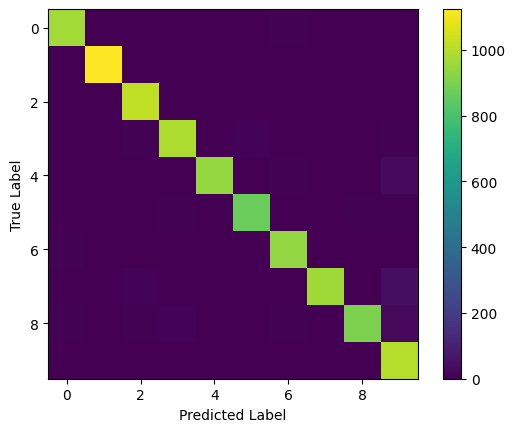

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels,preds)
plt.imshow(cm,interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
